In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import ipywidgets as widgets
from IPython.display import display
from IPython.core.display import HTML

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('../data/input_df.csv')
df.shape

(3397, 26)

In [3]:
df.isna().sum()

ranking                0
song                   0
band_singer            0
songurl                0
titletext              0
url                    0
year                   0
lyrics                 0
uri                    0
danceability        2911
energy              2911
key                 2911
loudness            2911
mode                2911
speechiness         2911
acousticness        2911
instrumentalness    2911
liveness            2911
valence             2911
tempo               2911
type                2911
id                  2911
track_href          2911
analysis_url        2911
duration_ms         2911
time_signature      2911
dtype: int64

In [4]:
X_cols = ['danceability','energy','loudness','speechiness','acousticness','liveness','valence']

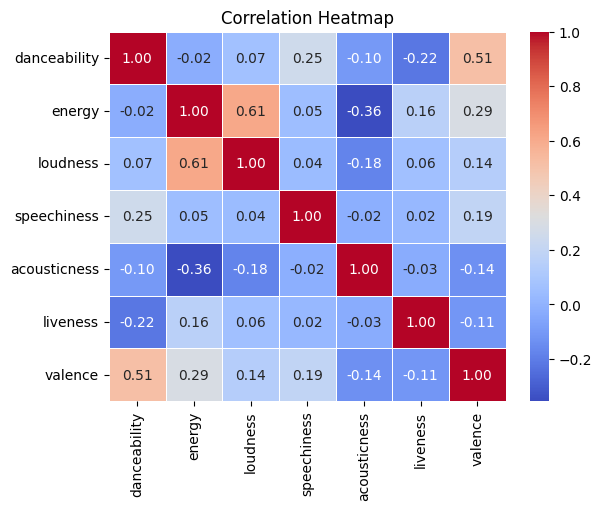

In [5]:
correlation_matrix = df[X_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
lyr_df = df[['band_singer','song', 'lyrics']]
lyr_df

,band_singer,song,lyrics
0,Faith Hill,Breathe,I can feel the magic floating in the air\nBein...
1,Santana,Smooth,"Man, it's a hot one\nLike seven inches from th..."
2,Rob Thomas,Smooth,"Man, it's a hot one\nLike seven inches from th..."
3,Santana,Maria Maria,"Ladies and gents, turn up your sound systems\n..."
4,The Product G&B,Maria Maria,Turn up this sound system\nTo the sound of Car...
...,...,...,...
3392,Lainey Wilson,Watermelon Moonshine,It was right after senior year\nJust before th...
3393,OMI,Cheerleader,When I need motivation\nMy one solution is my ...
3394,OMI,Felix Jaehn,When I need motivation\nMy one solution is my ...
3395,Mr Probz,Waves,My face above the water\nMy feet can't touch t...


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(lyr_df['lyrics']).toarray()
similarity_matrix = cosine_similarity(X)
np.fill_diagonal(similarity_matrix, 0)  # Ignore self-similarity
most_similar_indices = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)
idx1, idx2 = most_similar_indices
print(f"Most Similar Lyrics:\n\n1: {lyr_df.iloc[idx1]['lyrics']}\n\n2: {lyr_df.iloc[idx2]['lyrics']}")

Most Similar Lyrics:

1: Woo! Shady, Aftermath
Look at that bitch
Oh, shit, hey (Damn)

There she go, shakin' that ass on the flo'
Bumpin' and grindin' that pole
The way she's grindin' that pole
I think I'm losin' control

Get buzzed, get drunk, get crunk
Get fucked up, hit the strip club
Don't forget ones, get your dick rubbed, get fucked
Get sucked, get wasted, shit-faceted
Pasted, plastered – puke, drink, throw up
Get a new drink, hit the bathroom sink, throw up
Wipe your shoe clean, got a routine goin'
Still got a few chunks on them shoestrings showin'
I was dehydrated 'til the beat vibrated
I was revived as soon as this bitch gyrated
Them hips and licked them lips, and that was it
I had to get Nate Dogg here to sing some shit

Two to the one, from the one to the three
I like good pussy and I like good tree
Smoke so much weed, you wouldn't believe
And I get mo' ass than a toilet seat
Three to the one, from the one to the three
I met a bad bitch last night in the D
Let me tell you h

In [ ]:
singer_dropdown = widgets.Dropdown(
    options=df['band_singer'].unique(),
    description='Band or Singer:'
)

song_dropdown = widgets.Dropdown(
    options=[],
    description='Song:'
)

output = widgets.Output()

def update_songs(*args):
    selected_singer = singer_dropdown.value
    filtered_songs = lyr_df[lyr_df['band_singer'] == selected_singer]['song'].unique()
    song_dropdown.options = filtered_songs

singer_dropdown.observe(update_songs, names='value')

button = widgets.Button(
    description='Show Lyrics'
)

def show_lyrics(*args):
    with output:
        output.clear_output()
        selected_singer = singer_dropdown.value
        selected_song = song_dropdown.value
        song_details = lyr_df[(lyr_df['band_singer'] == selected_singer) & (lyr_df['song'] == selected_song)]
        print(song_details.iloc[0]['lyrics'])

button.on_click(show_lyrics)

update_songs()

# Display widgets
display(singer_dropdown, song_dropdown, button, output)

Dropdown(description='Band or Singer:', options=('Faith Hill', 'Santana', 'Rob Thomas', 'The Product G&B', 'Jo…

Dropdown(description='Song:', options=('Breathe', 'The Way You Love Me', "There You'll Be", 'Mississippi Girl'…

Button(description='Show Lyrics', style=ButtonStyle())

Output()